In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import stats

In [18]:
custom_palette = ['black', 'yellow', 'purple', 'green', 'blue', 'red', 'orange', 'pink']
plt.rcParams['figure.figsize'] = (12,6)
sns.set_theme(style = 'whitegrid', palette = custom_palette)

# Проверка статистической значимости различия выборочной средней и конкретного числа

Как мы знаем, тесты IQ специально стандартизируются таким образом, чтобы среднее число всегда равнялось 100 пунктам, а стандартное отклонение 15

Представим, что в некотором колледже протестировали 100 студентов, по результатам теста оказалось, что средний IQ составил 104 пункта, со стандартным отклонением в 20 пунктов, после чего ректор колледжа стал давать интервью прессе о том, что в его колледже учатся люди умнее, чем в среднем по популяции, проверим, имеет ли ректор право на такие утверждения

In [117]:
np.random.seed(131)
n = 100 #Количество студентов
q = 20 # Стандартное отклонение
mu = 102.5 # Среднее значение
iq = np.random.normal(mu, q, n)
id_student = np.random.randint(10000,100000,100)
data = pd.DataFrame({'id':id_student, 'IQ':iq})

КАк мы знаем, согласно центральной предельной теореме, выборочное среднее будет стремиться к среднему генеральной совокупности, а его стандартное отклонение будет равно ско/корень(количества наблюдений), тогда в случае конкретной выборки с 95% вероятностью истинное среднее будет находиться в интервале -t(0.05,n)*q < mu < mu + t(0.05,n).
То есть если среднее действительно отличается от некоторого числа, то это число не дролжно попасть в доверительный интервал для нового среднего

In [119]:
# Посчитаем критическое значение критерия стьюдента
a = 0.05 # Вероятность ошибки первого рода
df = n-1 # Количество степеней свободы
t_crit = st.t.ppf(1 - a/2, df)
print(f'Критическое значение стьюдента: {t_crit}')

# Посчитаем стандартную ошибку среднего 
se = q/np.sqrt(n)
print(f'Стандартная ошибка среднего {se}')

Критическое значение стьюдента: 1.9842169515086827
Стандартная ошибка среднего 2.0


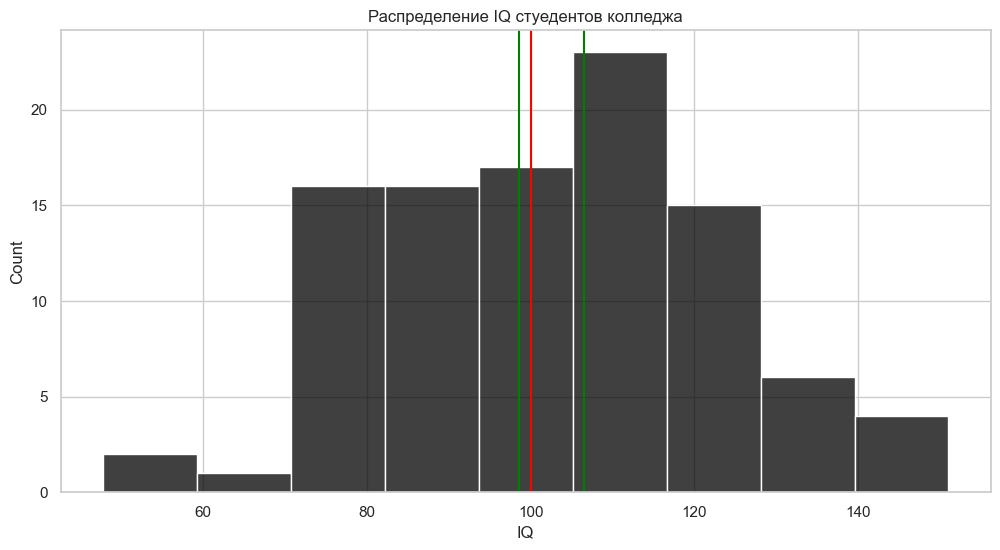

In [120]:
# Построим график распределения интеллекта стедентов колледжа
#добавив на него доверительный интервал их среднего значения, а также среднее значение по популяции
sns.histplot(data['IQ'])
plt.axvline(x = 100, color = 'red')
plt.axvline(x = mu - se*t_crit, color = 'green')
plt.axvline(x = mu + se*t_crit, color = 'green')
plt.title('Распределение IQ стуедентов колледжа')
plt.show()

Как мы видим, средний IQ входит в 95% доверительный интервал, значит у директора не было оснований для таких заявлений

In [118]:
# ВЫгрузим данные для визуализации в Power BI
data.to_excel('Сравнение среднего с числом.xlsx')

In [50]:
# Проверим наши выводы с помощью специального статистического теста
value = 100 # Средний iQ по популяции
alpha = 0.05 # Вероятность ошибки первого рода

results = st.ttest_1samp(data['IQ'], value)
print('Вероятность того, что среднее IQ студентов может оказаться равным 100 = ' ,results.pvalue)
if results.pvalue < alpha:
    print('Ректор был прав, результаты теста действительно выше средних значений по популяции')
else:
    print('Высказывания ректора были слишком громкими и необоснованными')

Вероятность того, что среднее IQ студентов может оказаться равным 100 =  0.22061873163333762
Высказывания ректора были слишком громкими и необоснованными


# Проверка значимости различия средних в двух независимых выборках

In [82]:
data2 = pd.read_csv('https://raw.githubusercontent.com/vkv82/Lesson/main/weight-height.csv')

In [84]:
data2['Height'] = data2['Height'] * 2.54

Проверим, значимо ли отличается средний рост мужчин и женщин

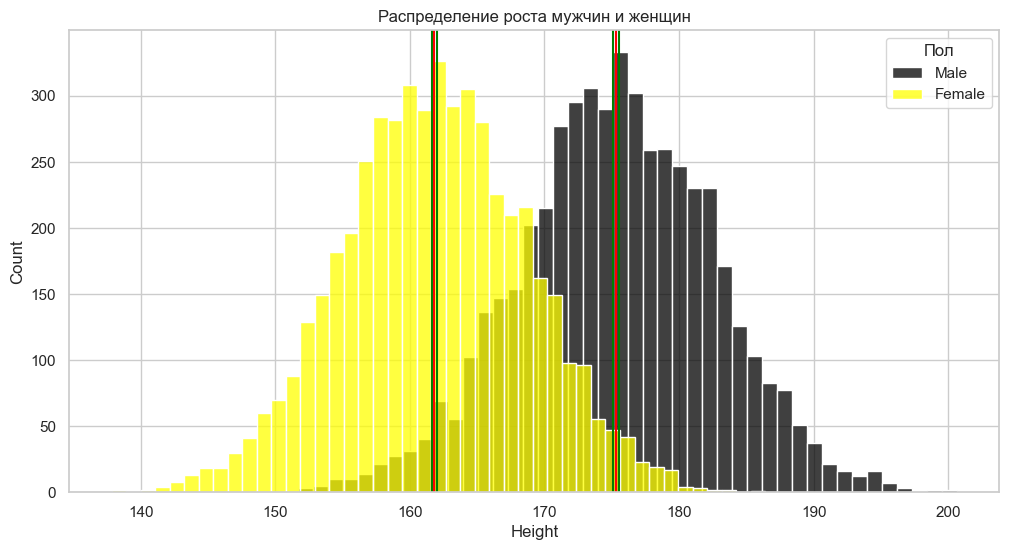

In [114]:
alpha = 0.05
for gen in data2['Gender'].unique():
    data_gen = data2.query('Gender == @gen')['Height']
    q = data_gen.std()
    mu = data_gen.mean()
    n = data_gen.count()
    se = q/np.sqrt(n)
    t_crit = st.t.ppf(1-alpha/2,n-1)
    sns.histplot(data_gen, label = gen)
    plt.axvline(x = mu + se*t_crit, color = 'green')
    plt.axvline(x = mu - se*t_crit, color = 'green')
    plt.axvline(x = mu, color = 'red')
plt.title('Распределение роста мужчин и женщин')
plt.legend(title = 'Пол')
plt.show()

In [86]:
alpha = 0.05
results = st.ttest_ind(data2.query('Gender == "Male"')['Height'], data2.query('Gender == "Female"')['Height'])
print(f'Вероятность совпадения средних: {results.pvalue}')
if results.pvalue < 0.05:
    print(f'Рост мужчин и женщин статистически значимо различается')
else:
    print(f'Различие в росте мужчин и женщин статистически не значимо')

Вероятность совпадения средних: 0.0
Рост мужчин и женщин статистически значимо различается


# Сравнение двух зависимых выборок

In [101]:
%automagic on


Automagic is ON, % prefix IS NOT needed for line magics.


In [98]:
data3 = pd.read_csv('C:\\Users\Арсений\Documents\Propranolol_Efficacy_Dataset.csv')

In [99]:
data3

,Subject_ID,Baseline_Score,Post_Treatment_Score
0,1,8,5
1,2,7,4
2,3,9,6
3,4,6,3
4,5,8,5
...,...,...,...
195,196,9,6
196,197,7,4
197,198,8,5
198,199,6,3


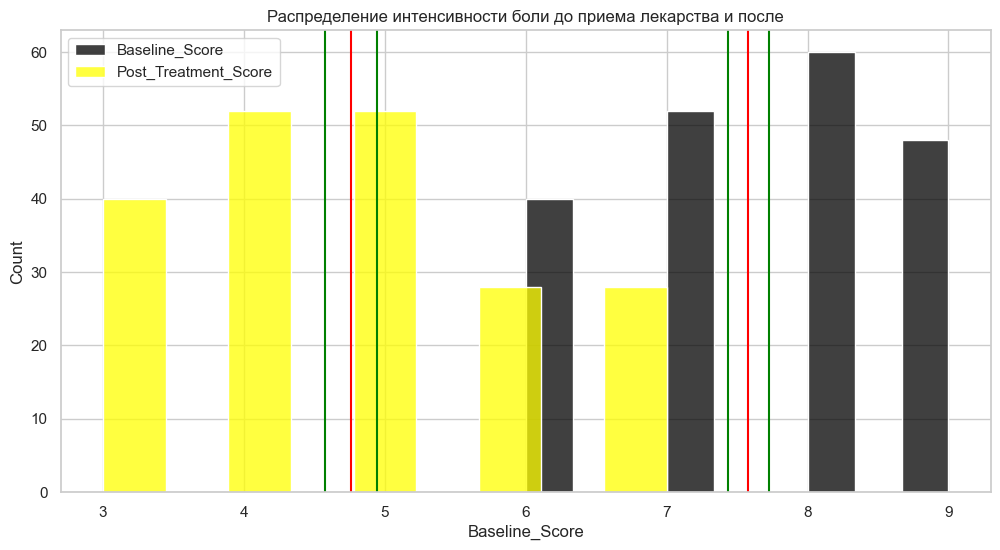

In [115]:
alpha = 0.05
for col in data3.columns[1:]:
    effect = data3[col]
    mu = effect.mean()
    q = effect.std()
    se = q/np.sqrt(effect.count())
    t_crit = st.t.ppf(1-alpha/2,effect.count()-1 )
    sns.histplot(effect, label = col)
    plt.axvline(x = mu + se*t_crit, color = 'green')
    plt.axvline(x = mu - se*t_crit, color = 'green')
    plt.axvline(x = mu, color = 'red')
plt.title('Распределение интенсивности боли до приема лекарства и после')
plt.legend()
plt.show()    

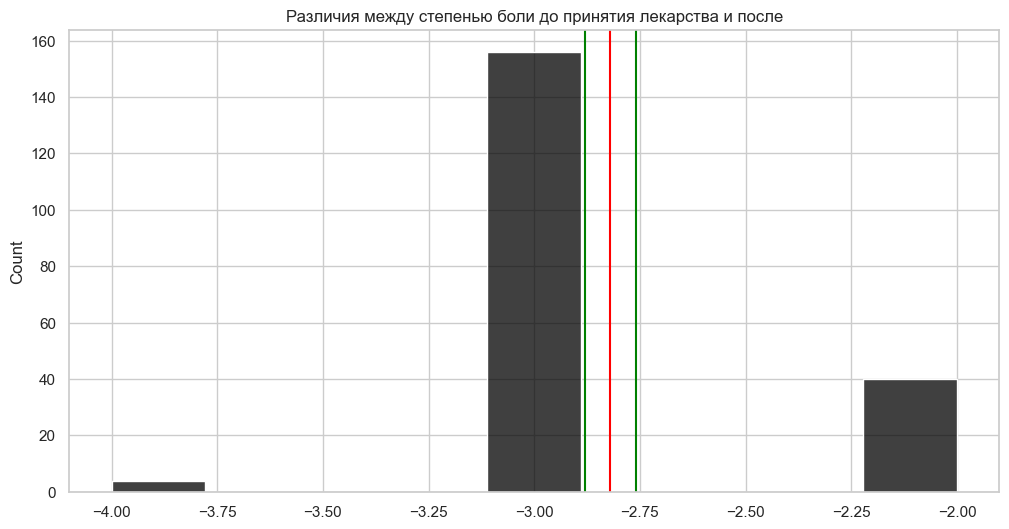

In [116]:
difference = data3['Post_Treatment_Score'] - data3['Baseline_Score']
mu_diff = difference.mean()
std_diff = difference.std()
se_diff = std_diff / np.sqrt(len(difference))
t_crit = st.t.ppf(1 - alpha/2, len(difference) - 1)
sns.histplot(difference)
plt.axvline(mu_diff - se_diff * t_crit, color='green')
plt.axvline(mu_diff + se_diff * t_crit, color='green')
plt.axvline(mu_diff, color='red')
plt.title('Различия между степенью боли до принятия лекарства и после')
plt.show()

В доверительный интервал для среднего различия не входит 0, следовательно различие статистически значимо, причем, мы видим, что уровень боли существенно снизился

In [107]:
alpha = 0.05 
results = st.ttest_rel(data3['Baseline_Score'], data3['Post_Treatment_Score'])
print(f'Вероятность совпадения средних: {results.pvalue}')
if results.pvalue < 0.05:
    print('Лекарство Пропранол эффективно помогает при мигрени')
else:
    print('Лекарство Пропранол не помогает при мигрени')

Вероятность совпадения средних: 6.863075368568691e-165
Лекарство Пропранол эффективно помогает при мигрени
